**Project Overview**

The primary goal of this project is to develop a machine learning model that accurately predicts which customers are likely to cancel their service (churn). By identifying these at-risk customers in advance, the telecom company can proactively offer them targeted incentives to stay, thereby reducing revenue loss and improving customer retention.

*Dataset*

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents
* The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

**Data Dictionary**

1. customer ID
2. gender: Whether the customer is a male or a female
3. Senior Citizen: Whether the customer is a senior citizen or not (1, 0)
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No)
6. tenure: Number of months the customer has stayed with the company
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two year)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card)
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No)

**Success Metrcis**

Machine Learning Metrics: The model's performance will be evaluated using Precision, Recall, and the AUC-ROC score. The focus will be on achieving a high Recall to ensure we identify as many potential churners as possible, even at the cost of some false positives.

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
sns.set(style='whitegrid')

**Load Dataset**

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2221,8619-IJNDK,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),64.05,4492.9,No
831,9650-VBUOG,Male,0,Yes,Yes,38,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.05,963.95,No
3133,3181-VTHOE,Male,0,Yes,No,70,No,No phone service,DSL,No,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),51.05,3635.15,No
6351,1842-EZJMK,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,103.70,5071.05,Yes
6644,0898-XCGTF,Male,0,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),96.50,5673.7,No


**Data Info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.shape)
print(df.duplicated().sum())

(7043, 21)
0


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

**Preprocessing**

In [8]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print(df['TotalCharges'].isna().sum())

0


In [9]:
df.drop(['customerID'], axis=1, inplace=True)

In [10]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
df.duplicated().sum()

np.int64(22)

In [12]:
print("\nDuplicate occurrences (excluding first appearance):")
display(df[df.duplicated(keep='first')])


Duplicate occurrences (excluding first appearance):


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,1
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,1
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,0
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,1
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,0
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,0
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,0
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,1
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,0
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,1


In [13]:
# remove duplicates, keep first, reset index
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.duplicated().sum())
print("Shape after removing duplicates:", df.shape)

0
Shape after removing duplicates: (7021, 20)


**EDA**

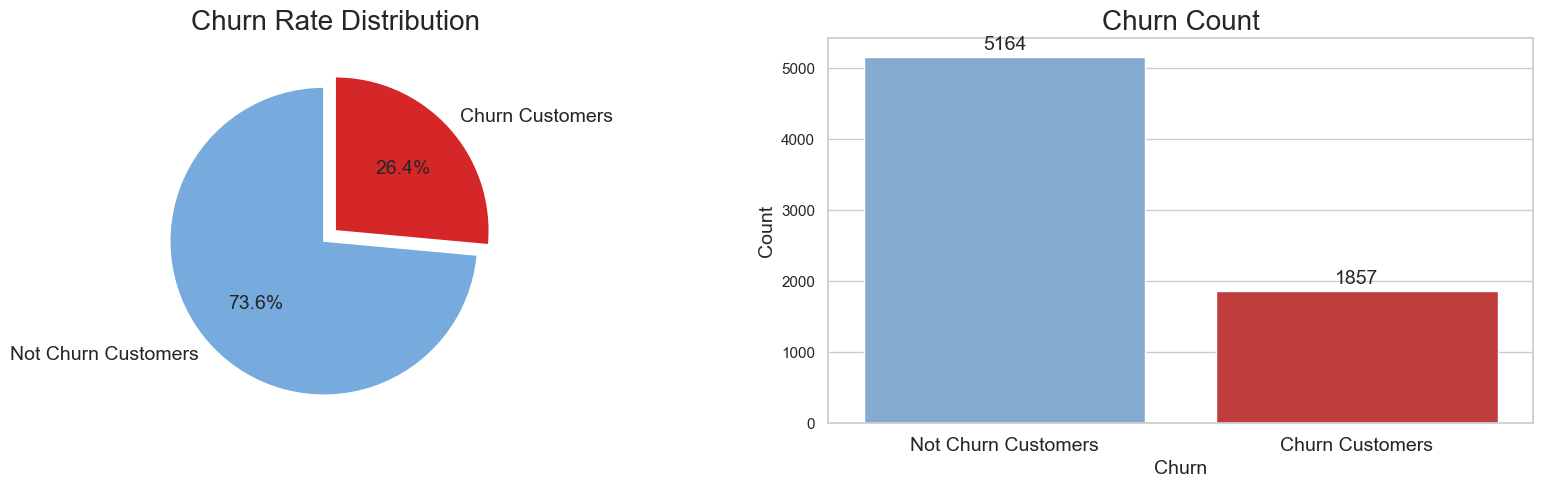

In [14]:
colors=['#77aadd','#d62728']
cnt=list(df['Churn'].value_counts())
circle=[cnt[0]/sum(cnt)*100,cnt[1]/sum(cnt)*100]

fig=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels=['Not Churn Customers','Churn Customers'],autopct='%1.1f%%',startangle=90,colors=colors,explode=(0.1,0),textprops={'fontsize':14})
plt.title('Churn Rate Distribution',fontsize=20)

plt.subplot(1,2,2)
sns.countplot(x='Churn',data=df,palette=colors)
plt.xticks(ticks=[0,1],labels=['Not Churn Customers','Churn Customers'],fontsize=14)  
plt.ylabel('Count',fontsize=14)
plt.xlabel('Churn',fontsize=14)
plt.title('Churn Count',fontsize=20)
for i in range(2):           #For adding text on bars
    plt.text(i,cnt[i]+100,str(cnt[i]),ha='center',fontsize=14)

plt.show()


From plots it is evident that our dataset is imbalanced as churn rate is 26.4%.

*Churn Rate Distribution by Demographics*

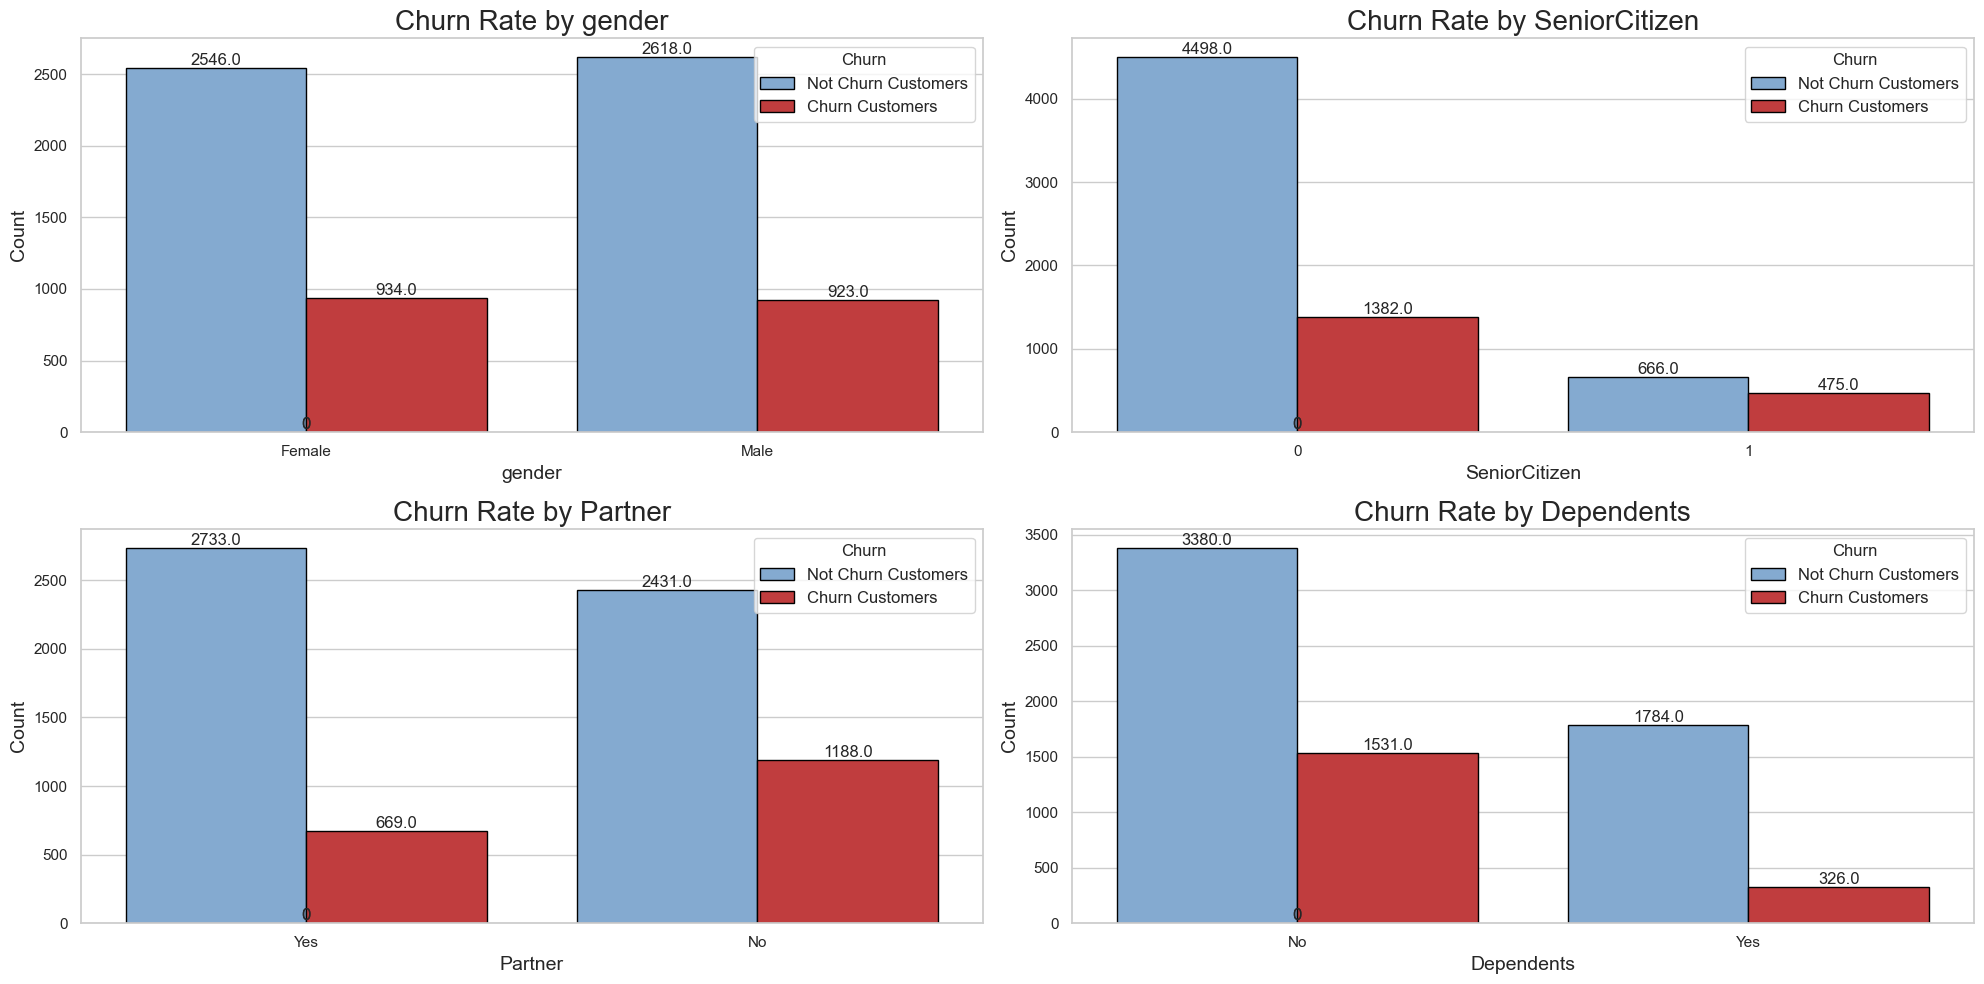

In [15]:
demo=['gender','SeniorCitizen','Partner','Dependents']
fig=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
for i in range(len(demo)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=demo[i],hue='Churn',data=df,palette=colors,edgecolor='black')
    plt.xlabel(demo[i],fontsize=14)
    plt.ylabel('Count',fontsize=14)
    plt.title(f'Churn Rate by {demo[i]}',fontsize=20)
    plt.legend(title='Churn',labels=['Not Churn Customers','Churn Customers'],fontsize=12) 
    for p in plt.gca().patches:           #For adding text on bars
        height = p.get_height()
        plt.gca().annotate(f'{height}', (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

1. Customer churning for male & female customers is very similar to each other!
2. We have very low numbers of senior citizens and out of them nearly 40% churns.
3. Customers housing with a partner churned less as compared to those not living with partners.
4. Customers having no dependents churned more!!

*Churn Rate Distribution by Services*

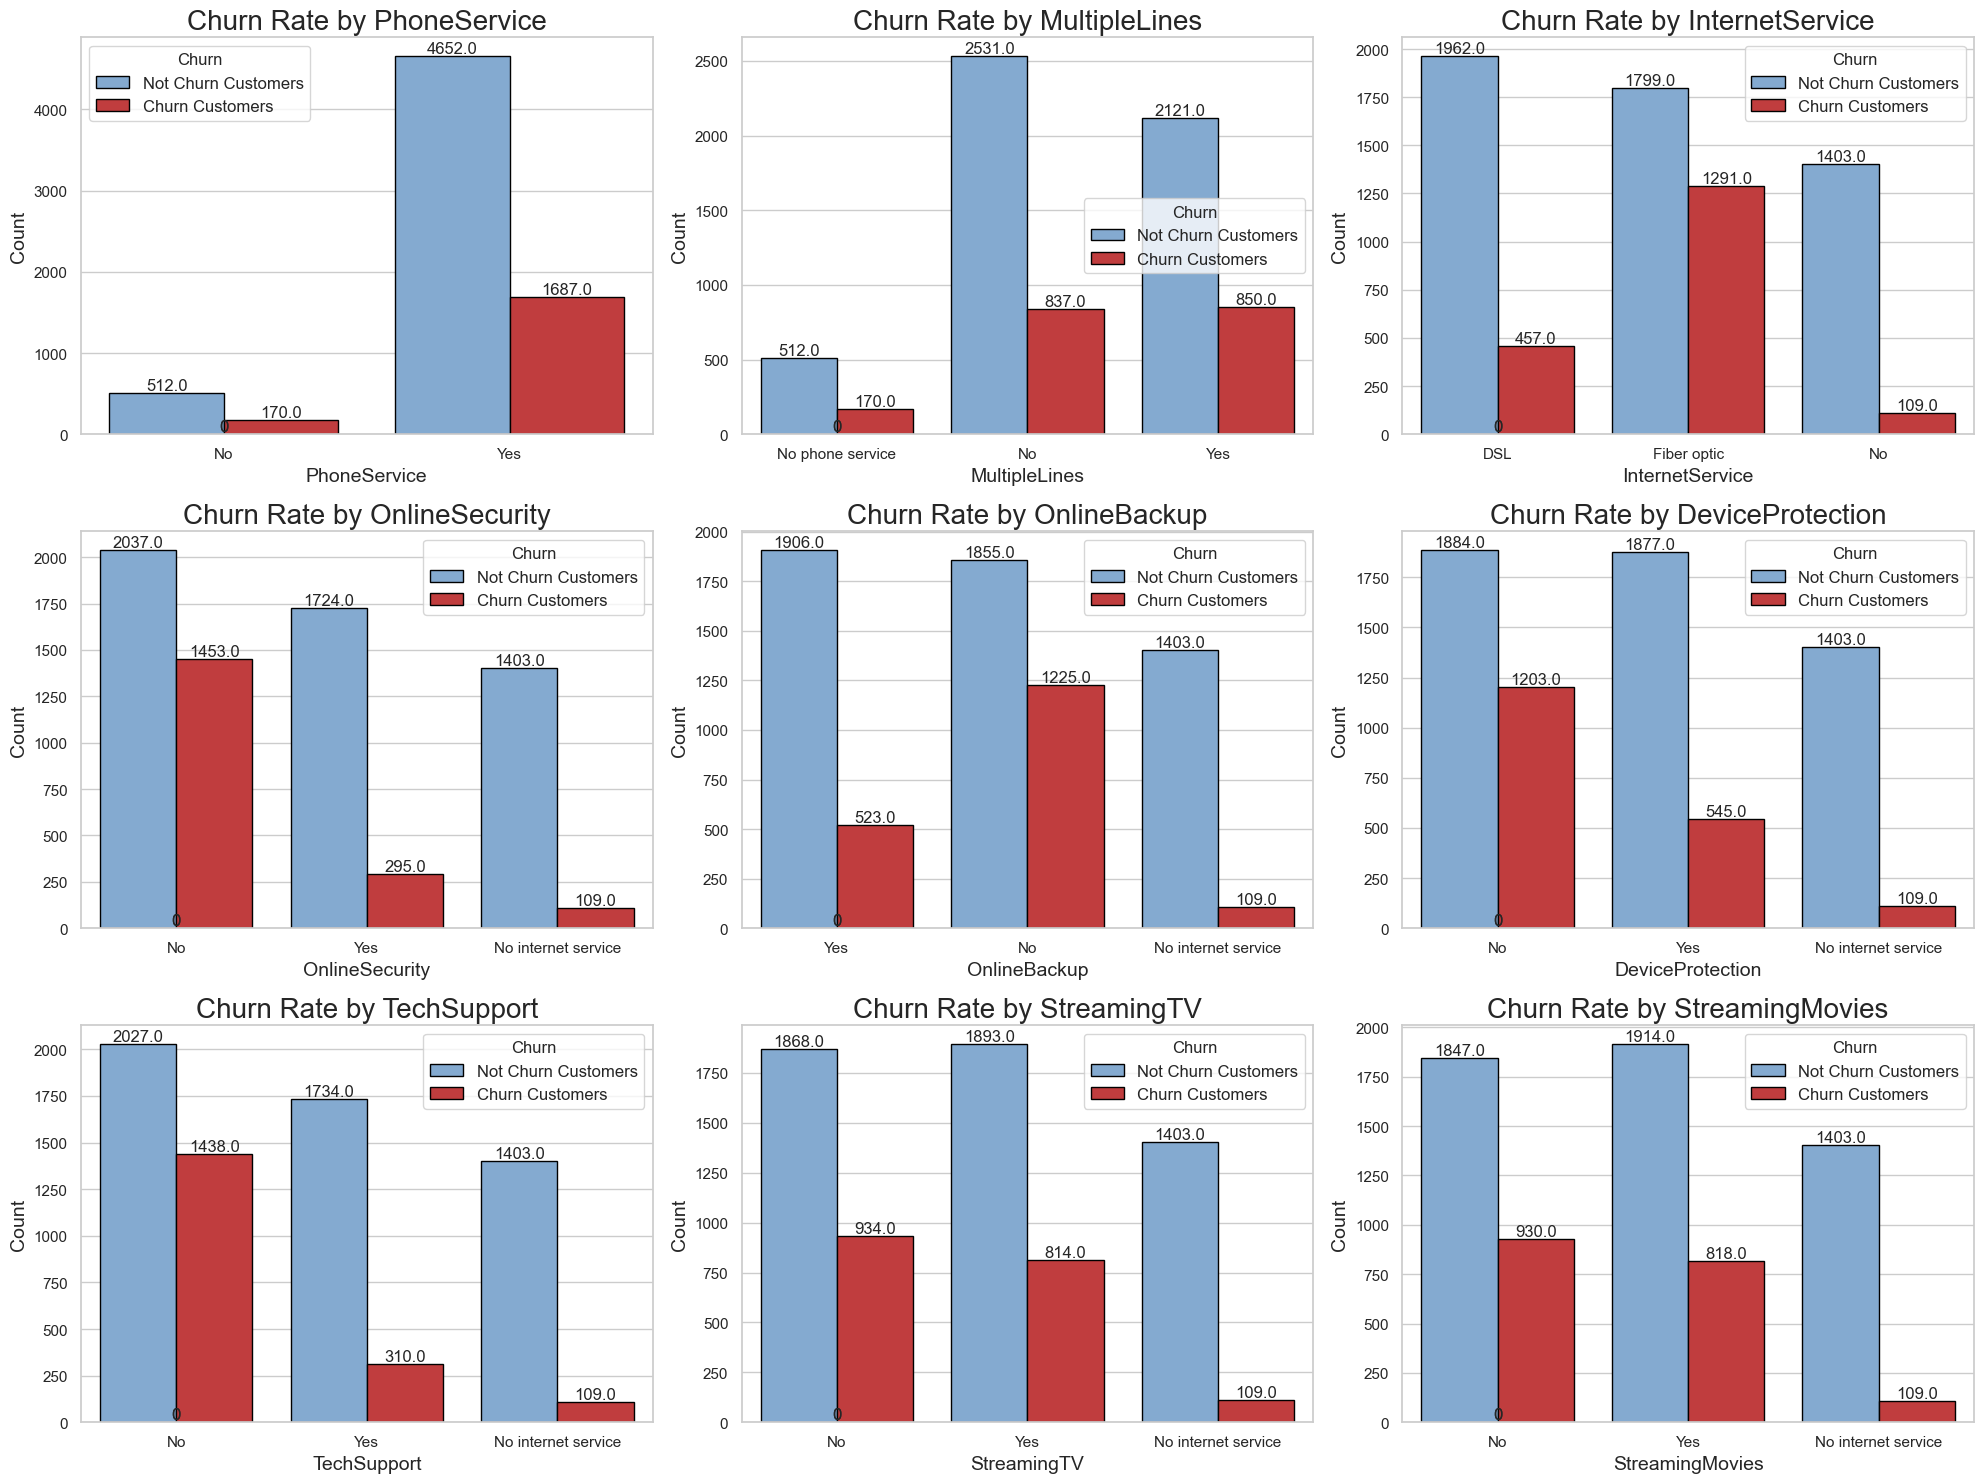

In [16]:
services=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig=plt.subplots(nrows=3,ncols=3,figsize=(20,15))
for i in range(len(services)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=services[i],hue='Churn',data=df,palette=colors,edgecolor='black')
    plt.xlabel(services[i],fontsize=14)
    plt.ylabel('Count',fontsize=14)
    plt.title(f'Churn Rate by {services[i]}',fontsize=20)
    plt.legend(title='Churn',labels=['Not Churn Customers','Churn Customers'],fontsize=12) 
    for p in plt.gca().patches:           #For adding text on bars
        height = p.get_height()
        plt.gca().annotate(f'{height}', (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

1. Despite no phone services more customers retained as compared to churned.
2. In case of multiple lines, similar churn rate if multiple lines are present or not.
3. Customers having fiber optic tend to churn more as compared to those does not having fiber optic.
4. Services like OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport are very crucial as customers without having these services churned more.
5. Despite of being subscribed to streaming TV and streaming movies a lot of customers churned!!

*Churn Rate by Contract Type and Mode of Payment and Billing*

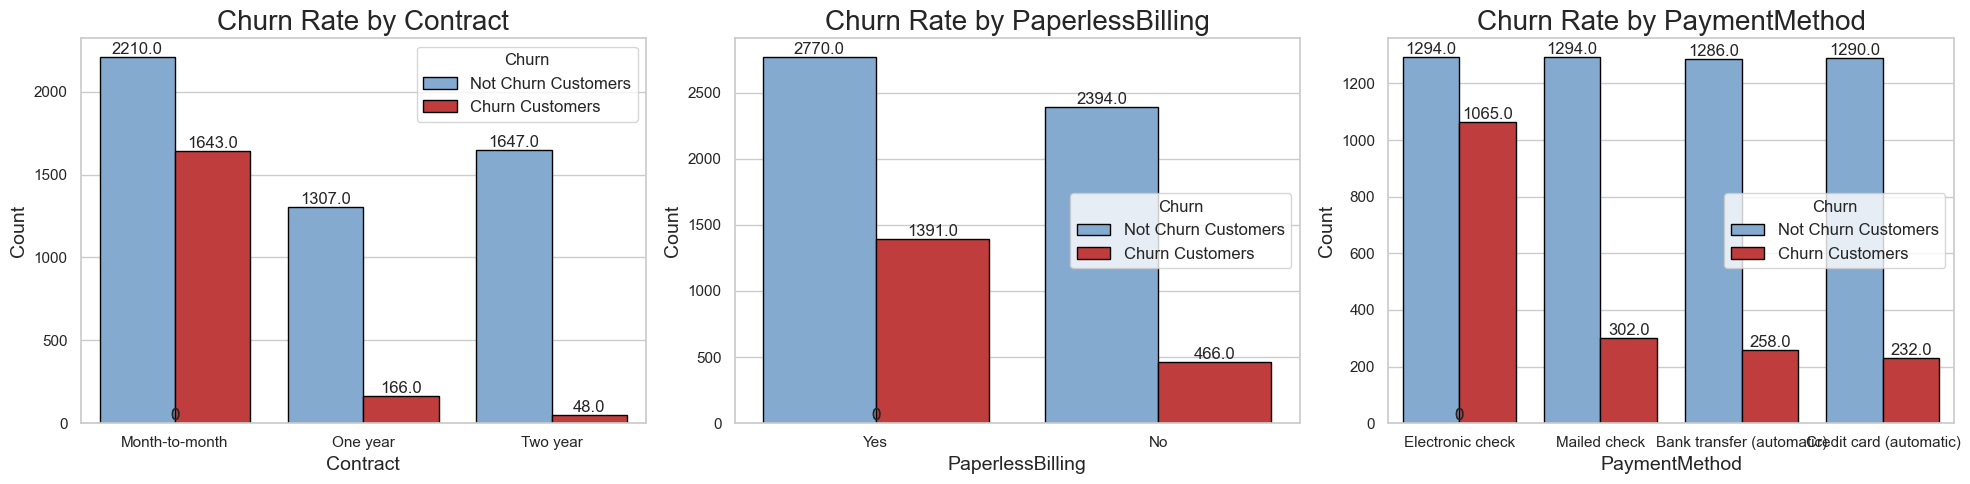

In [17]:
other=['Contract','PaperlessBilling','PaymentMethod']
fig=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
for i in range(len(other)):
    plt.subplot(1,3,i+1)
    sns.countplot(x=other[i],hue='Churn',data=df,palette=colors,edgecolor='black')
    plt.xlabel(other[i],fontsize=14)
    plt.ylabel('Count',fontsize=14)
    plt.title(f'Churn Rate by {other[i]}',fontsize=20)
    plt.legend(title='Churn',labels=['Not Churn Customers','Churn Customers'],fontsize=12) 
    for p in plt.gca().patches:           #For adding text on bars
        height = p.get_height()
        plt.gca().annotate(f'{height}', (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

1. Customers on month-to-month contracts show 1655 customers churned suggests offering retention offers to month-to-month customers.
2. Paperless billing displays a high numbers of customers being churned out. This is probably due to some payment issue or reciept issues.
3. Customers clearly resented the Electronic check PaymentMethod. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.


*Numerical Features Distribution*

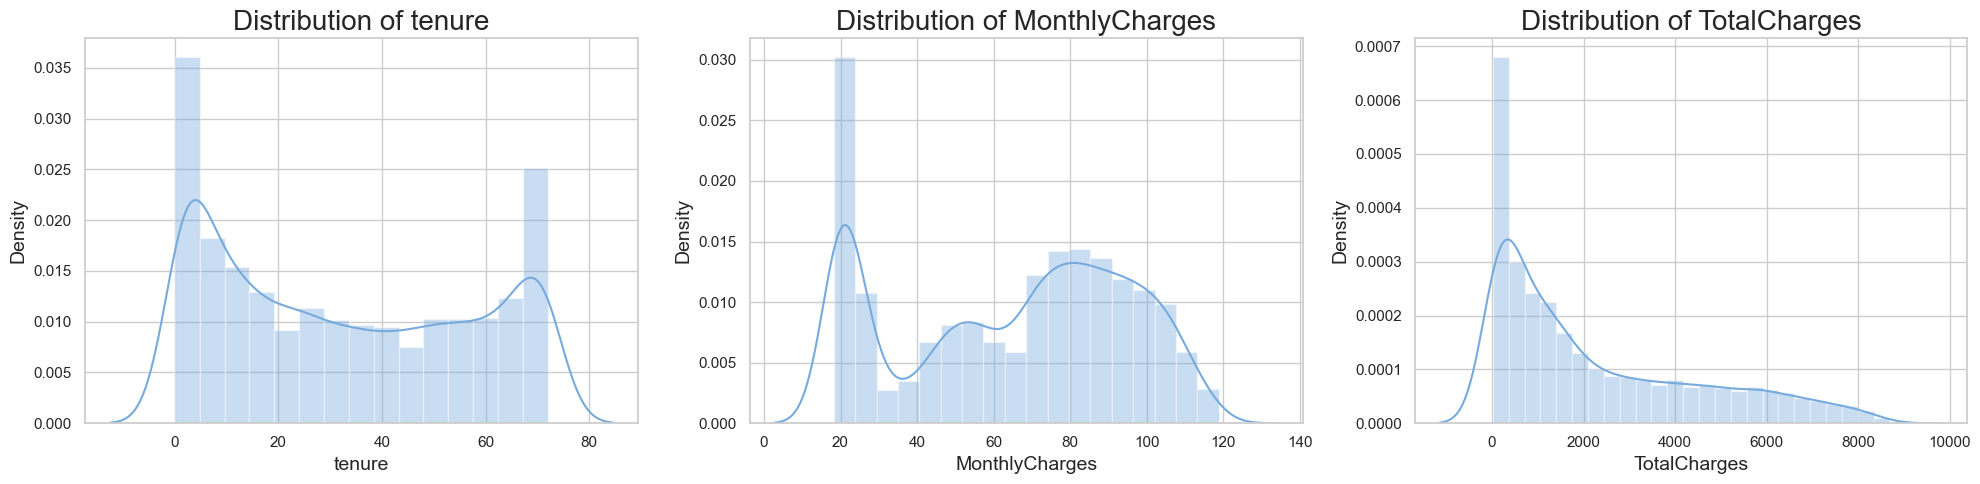

In [18]:
numerical=['tenure','MonthlyCharges','TotalCharges']
fig=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
for i in range(len(numerical)):
    plt.subplot(1,3,i+1)
    sns.distplot(df[numerical[i]],kde=True,color='#77aadd')
    plt.xlabel(numerical[i],fontsize=14)
    plt.ylabel('Density',fontsize=14)
    plt.title(f'Distribution of {numerical[i]}',fontsize=20)
plt.tight_layout()
plt.show()

Both tenure and MonthlyCharges are appeared to be bimodal while TotalCharges displays right skewed distribution.

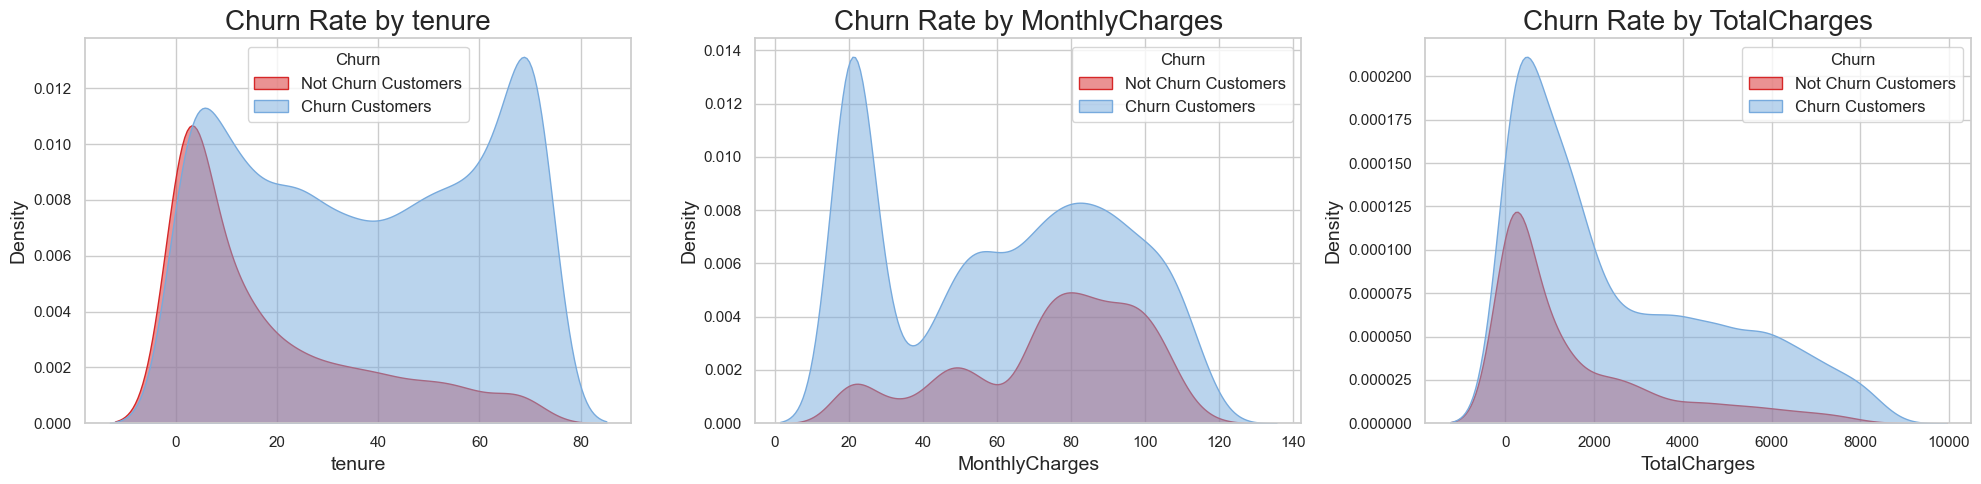

In [19]:
numerical=['tenure','MonthlyCharges','TotalCharges']
fig=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
for i in range(len(numerical)):
    plt.subplot(1,3,i+1)
    sns.kdeplot(data=df,x=numerical[i],hue='Churn',fill=True,palette=colors,alpha=0.5)
    plt.xlabel(numerical[i],fontsize=14)
    plt.ylabel('Density',fontsize=14)
    plt.title(f'Churn Rate by {numerical[i]}',fontsize=20)
    plt.legend(title='Churn',labels=['Not Churn Customers','Churn Customers'],fontsize=12) 
plt.tight_layout()
plt.show()


1. tenure distribution results in low customer churning as the tenure increases. It displays a symmetrical graph with the left side dominating with churn numbers and right side dominating with low churn numbers.
2. Upon increasing monthly charges, rate of customers churning also increases.
3. Since TotalCharges is a product of tenure and MonthlyCharges so it is following different pattern as compared to monthly charges that is lower total charges leads to more churning which is due to more impact of tenure here.

*Numerical and Categorical Features Analysis*

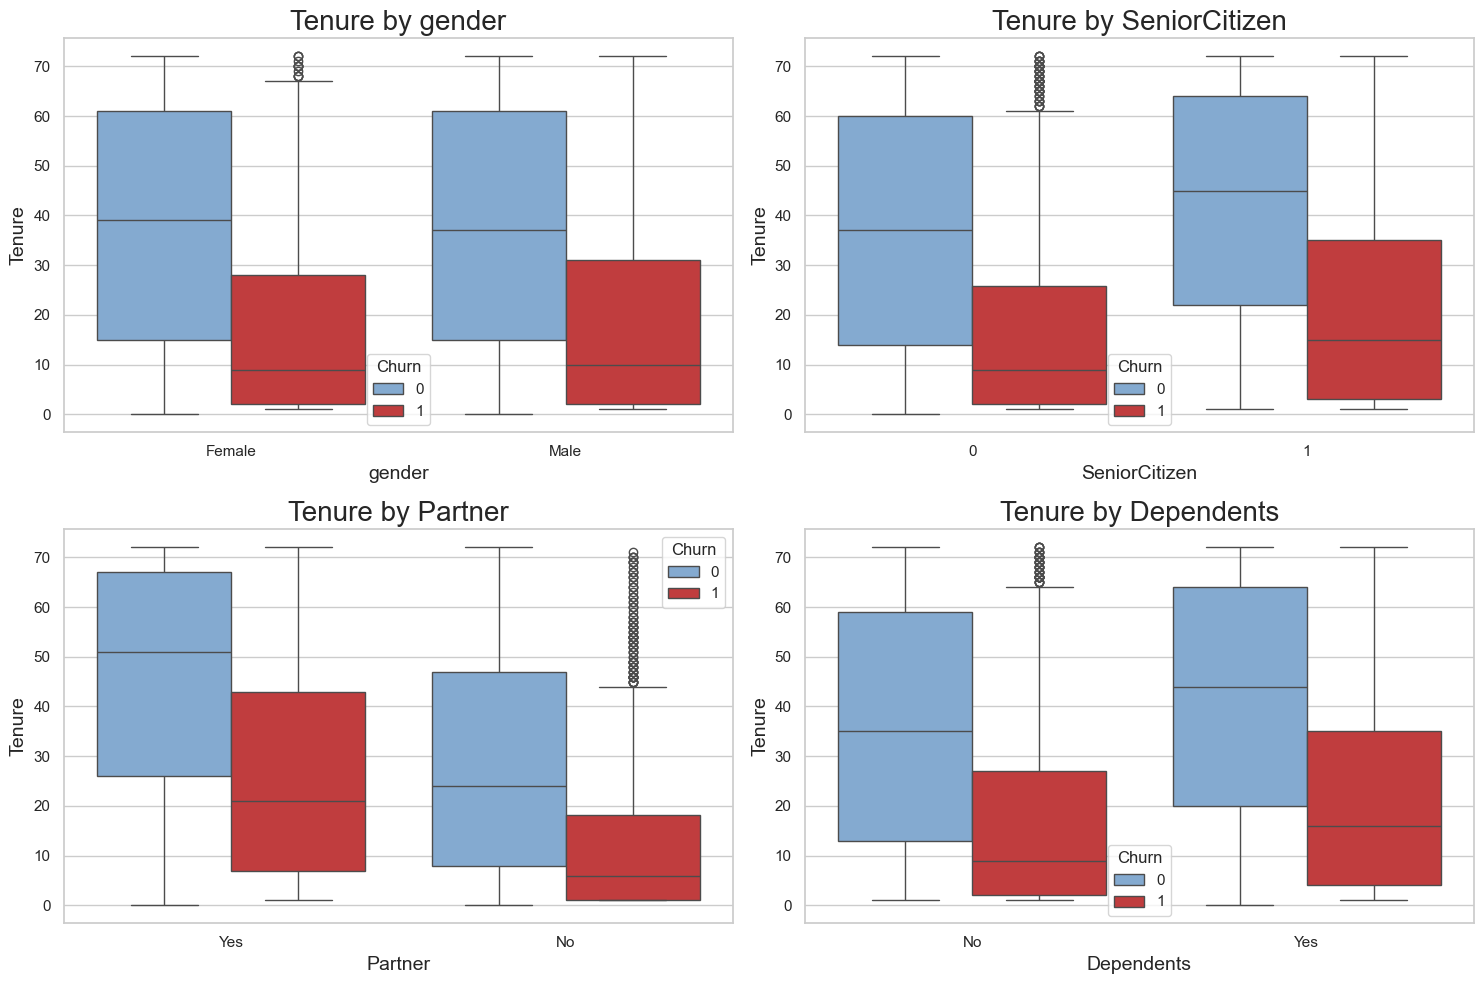

In [20]:
fig=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
for i in range(len(demo)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=demo[i],y='tenure',hue='Churn',data=df,palette=colors)
    plt.xlabel(demo[i],fontsize=14)
    plt.ylabel('Tenure',fontsize=14)
    plt.title(f'Tenure by {demo[i]}',fontsize=20)
plt.tight_layout()
plt.show()

1. Male and female churn plots are identical.
2. Senior citizens opted out from the services for a tenure values of 0 - 35 months.
3. Customers with partner churned within 5-45 months.
4. Customers having dependents churned within 25 months.

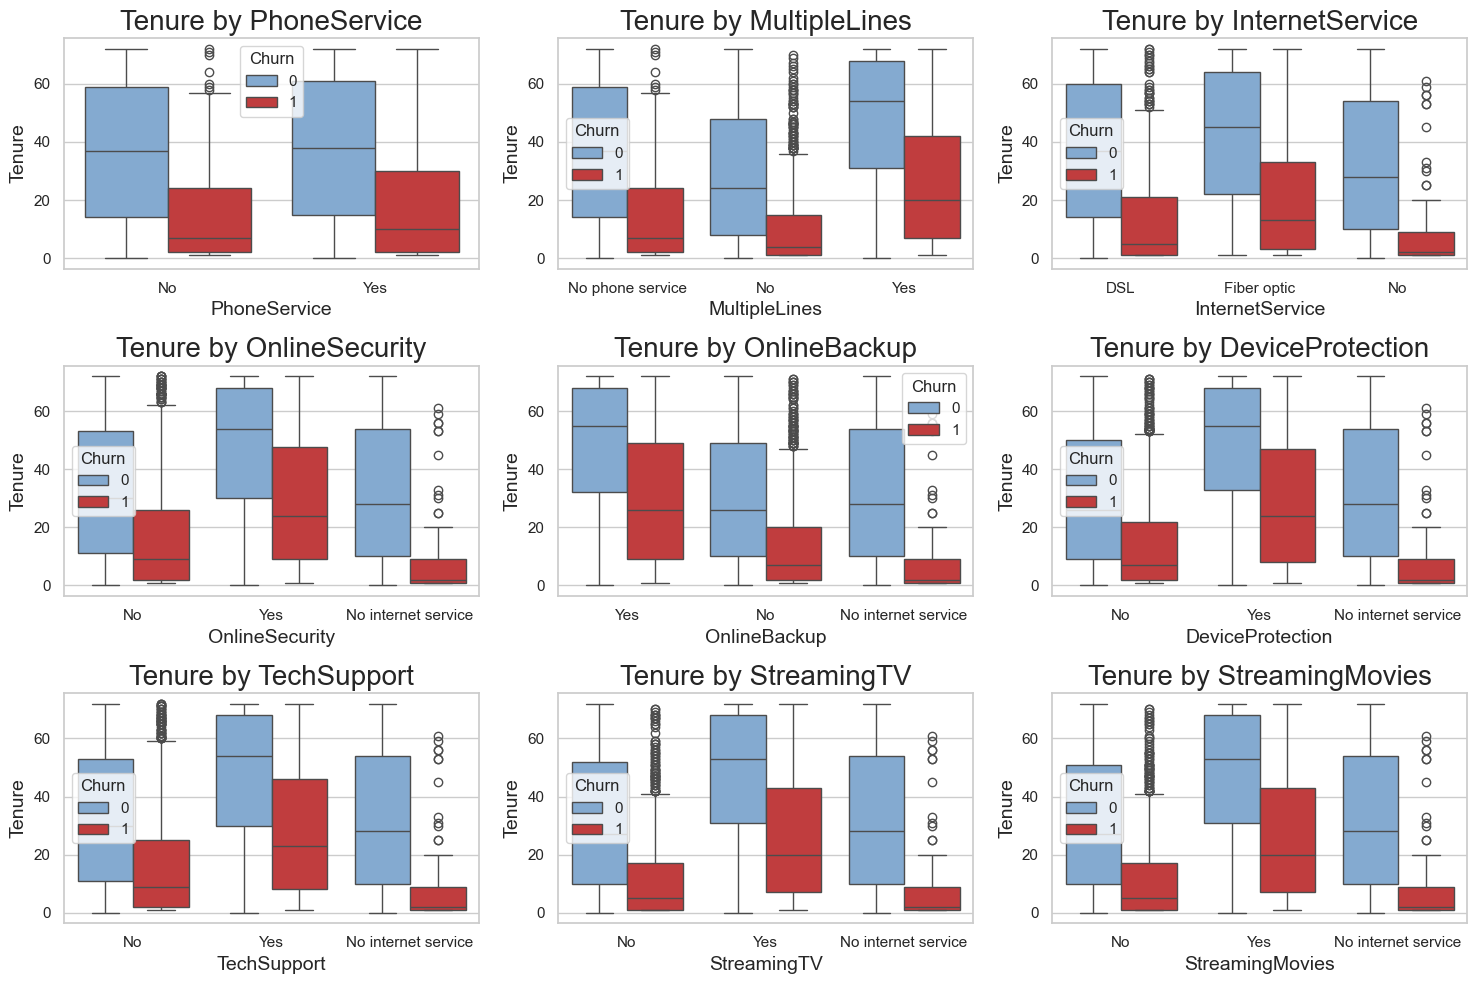

In [21]:
fig=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
for i in range(len(services)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=services[i],y='tenure',hue='Churn',data=df,palette=colors)
    plt.xlabel(services[i],fontsize=14)
    plt.ylabel('Tenure',fontsize=14)
    plt.title(f'Tenure by {services[i]}',fontsize=20)
plt.tight_layout()
plt.show()

1. Overall trend:
Customers who churn (red boxes) consistently have shorter tenure compared to non-churners (blue boxes) across almost all service categories.
This indicates that customer retention improves with longer tenure.

2. PhoneService & MultipleLines:
Churners with PhoneService = Yes or MultipleLines = Yes generally have lower tenure, suggesting that these services alone are not sufficient to retain customers.

3. InternetService:
Fiber optic users show higher churn with shorter tenure, possibly due to higher costs or service dissatisfaction.
DSL and No Internet Service groups have lower churn, implying more stable or satisfied customers.

4. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport:
Customers without these add-on services tend to churn more frequently and have lower tenure.
This suggests that value-added services correlate with higher retention, possibly because they increase perceived value and reduce switching likelihood.

5. StreamingTV & StreamingMovies:
Churners in these groups have lower tenure, but the difference between churners and non-churners is less pronounced than for security or support services.
This implies that entertainment services may have a weaker impact on churn behavior compared to utility-based services (like TechSupport).


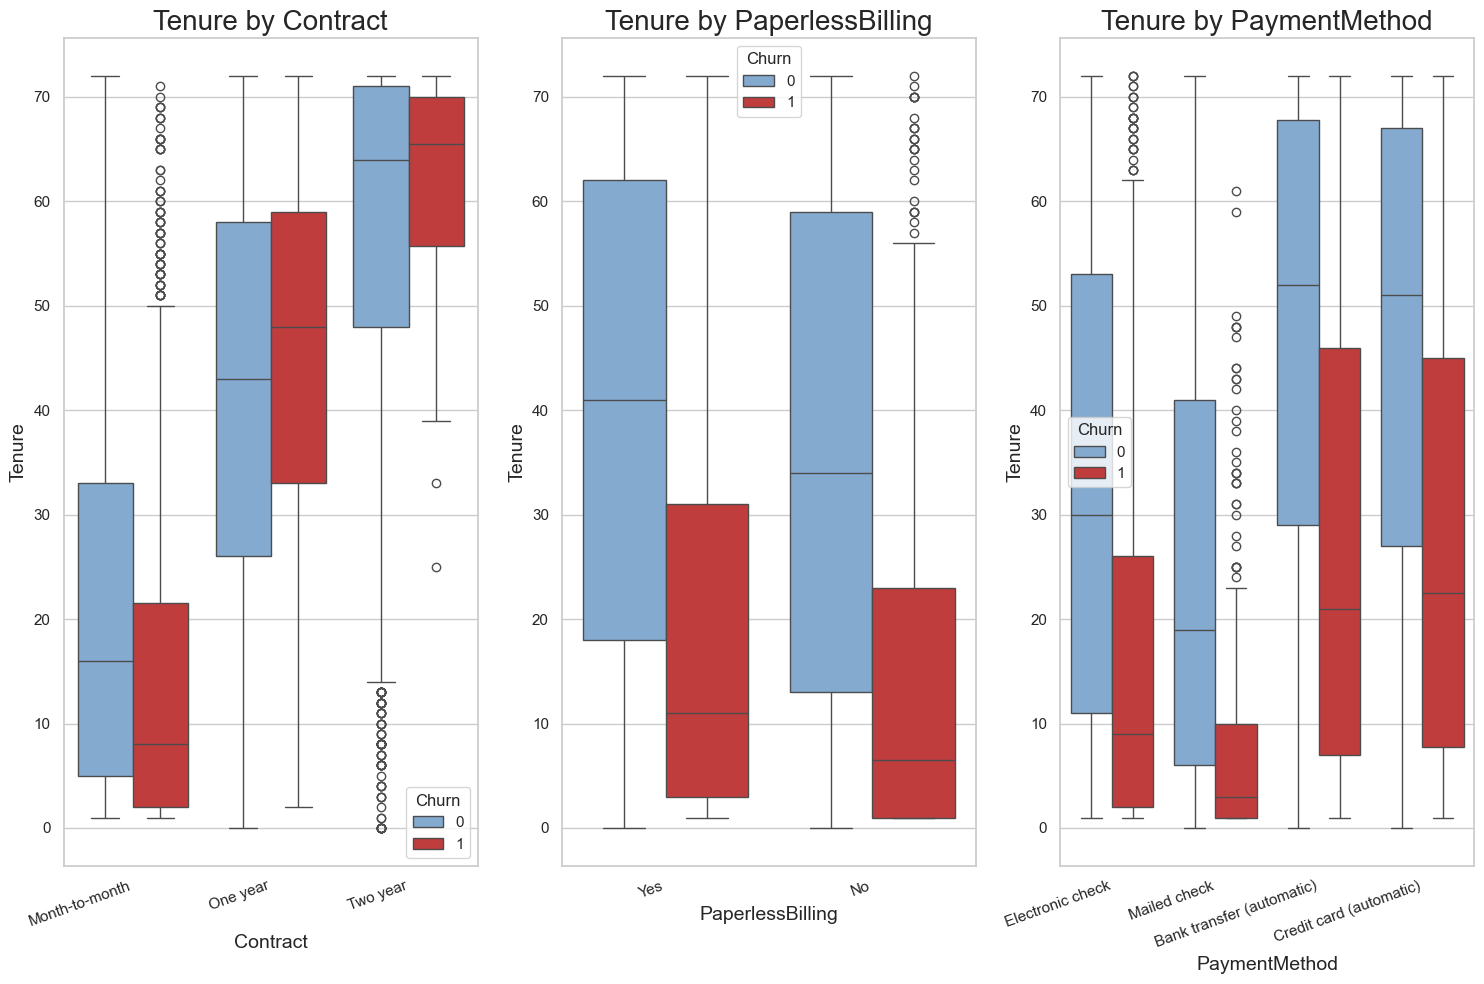

In [22]:
fig=plt.subplots(nrows=1,ncols=3,figsize=(15,10))
for i in range(len(other)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=other[i],y='tenure',hue='Churn',data=df,palette=colors)
    plt.xlabel(other[i],fontsize=14)
    plt.ylabel('Tenure',fontsize=14)
    plt.title(f'Tenure by {other[i]}',fontsize=20)
    plt.xticks(rotation=20, ha='right')  #For better visibility of x-axis labels
plt.tight_layout()
plt.show()

1. Month-to-month contracts are the strongest predictor of early churn, with these customers having significantly shorter tenures.
2. Customers who churn are more likely to use paperless billing, while the most loyal, long-tenured customers often do not
3. Automatic payments are linked to high tenure and customer loyalty, whereas electronic checks are associated with very short tenures and high churn.

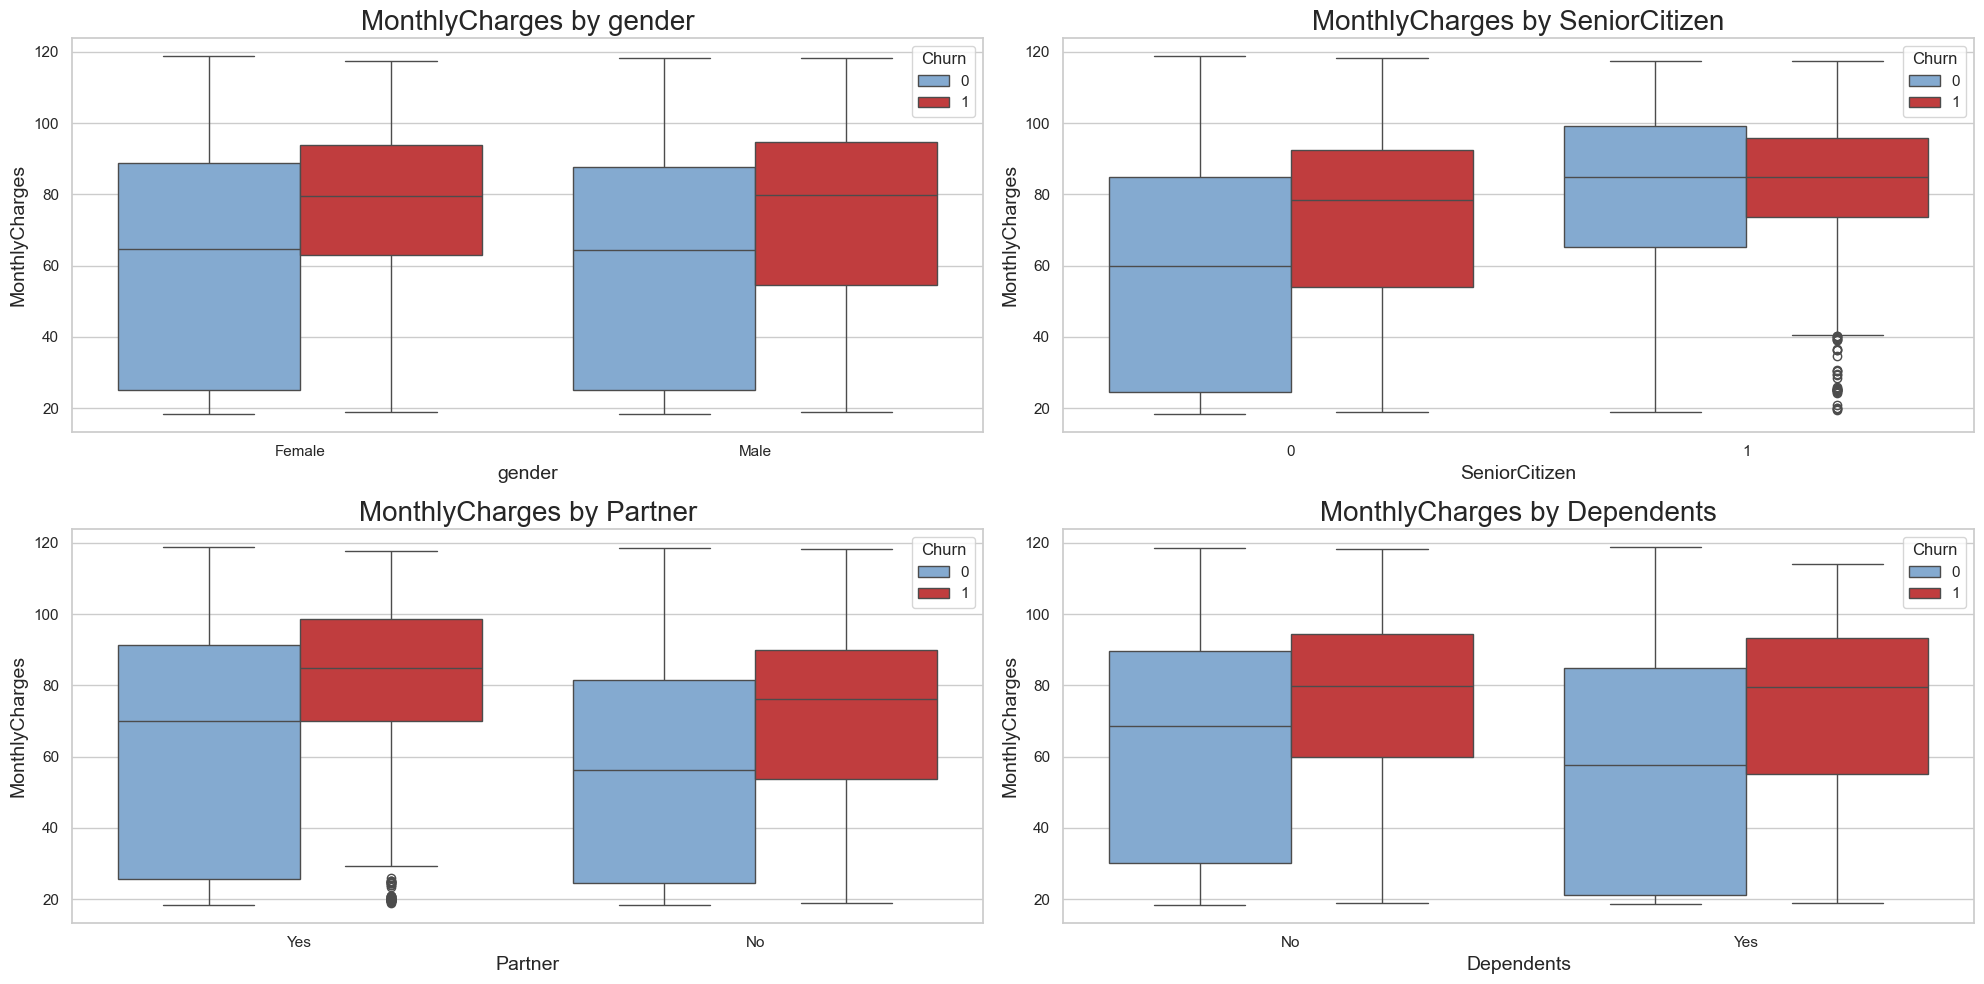

In [23]:
fig=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
for i in range(len(demo)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=demo[i],y='MonthlyCharges',hue='Churn',data=df,palette=colors)
    plt.xlabel(demo[i],fontsize=14)
    plt.ylabel('MonthlyCharges',fontsize=14)
    plt.title(f'MonthlyCharges by {demo[i]}',fontsize=20)
plt.tight_layout()
plt.show()

* For all the features mentioned above, the median value of the not-churn customers is very close to the lower limit of the churn customers.
* Male & Female customers have the same median MonthlyCharges of around 60. For SeniorCitizen, this value is pushed to 80.
* Customers living with Partner have a higher lower limit of churning, MonthlyCharges of 70, than those living alone, MonthlyCharges of just below 60!

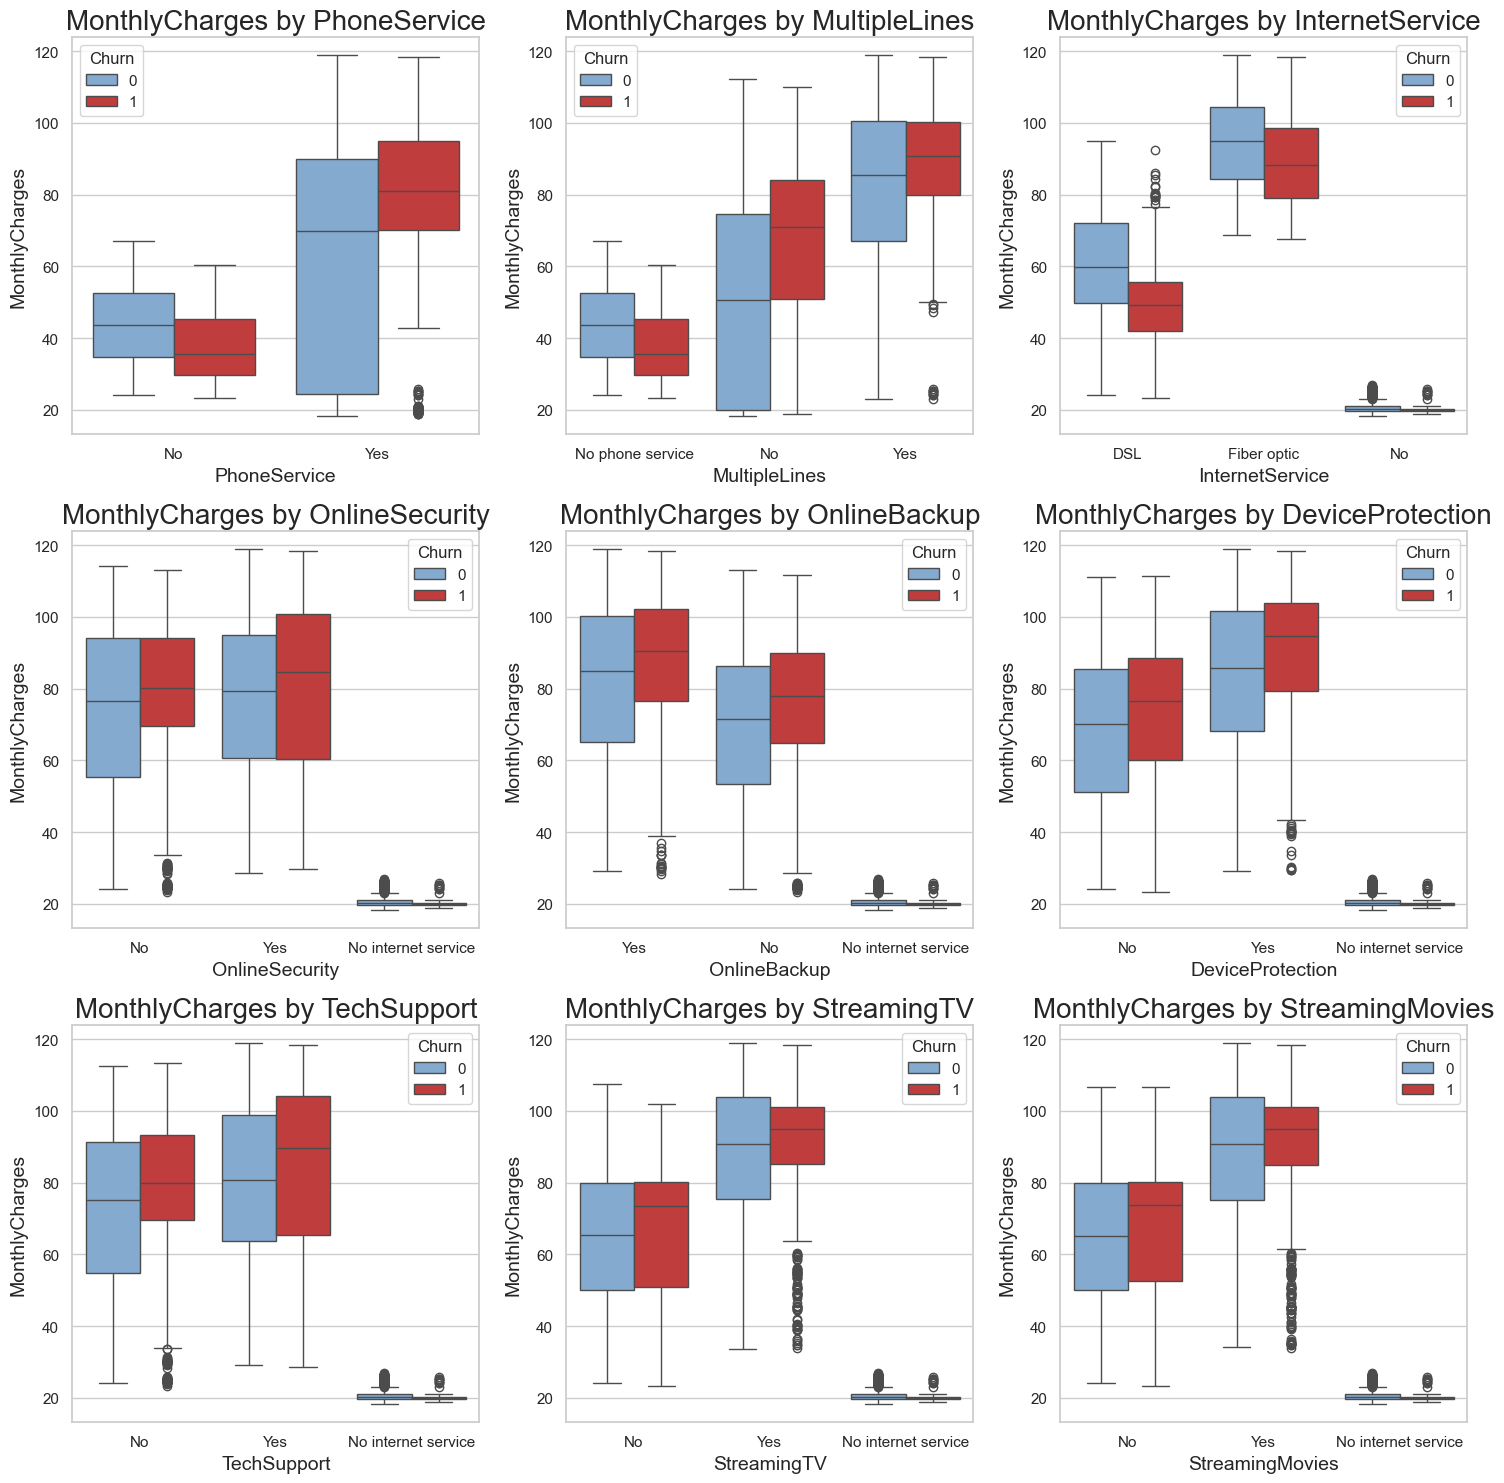

In [24]:
fig=plt.subplots(nrows=3,ncols=3,figsize=(15,15))
for i in range(len(services)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=services[i],y='MonthlyCharges',hue='Churn',data=df,palette=colors)
    plt.xlabel(services[i],fontsize=14)
    plt.ylabel('MonthlyCharges',fontsize=14)
    plt.title(f'MonthlyCharges by {services[i]}',fontsize=20)
plt.tight_layout()
plt.show()

* Phone Service: Customers with phone service churn at significantly higher monthly charges than those who stay.
* Multiple Lines: Among customers with multiple lines, those who churn pay a considerably higher median monthly charge.
* Internet Service: Customers with Fiber optic internet pay the most and represent the largest, most distinct group of churners.
* Online Security: Not having Online Security is a strong risk factor for churn, particularly among customers with high monthly bills.
* Online Backup: Similar to security, customers without Online Backup are more prone to churn, especially when their charges are high.
* Device Protection: Lacking Device Protection correlates with a higher likelihood of churn, especially for customers on premium plans.
* Tech Support: Not subscribing to Tech Support is a major indicator of churn, particularly for customers paying high monthly rates.
* Streaming TV: For any given monthly charge, customers without Streaming TV are slightly more likely to churn.
* Streaming Movies: Customers who churn consistently pay more, regardless of whether they have the Streaming Movies service.

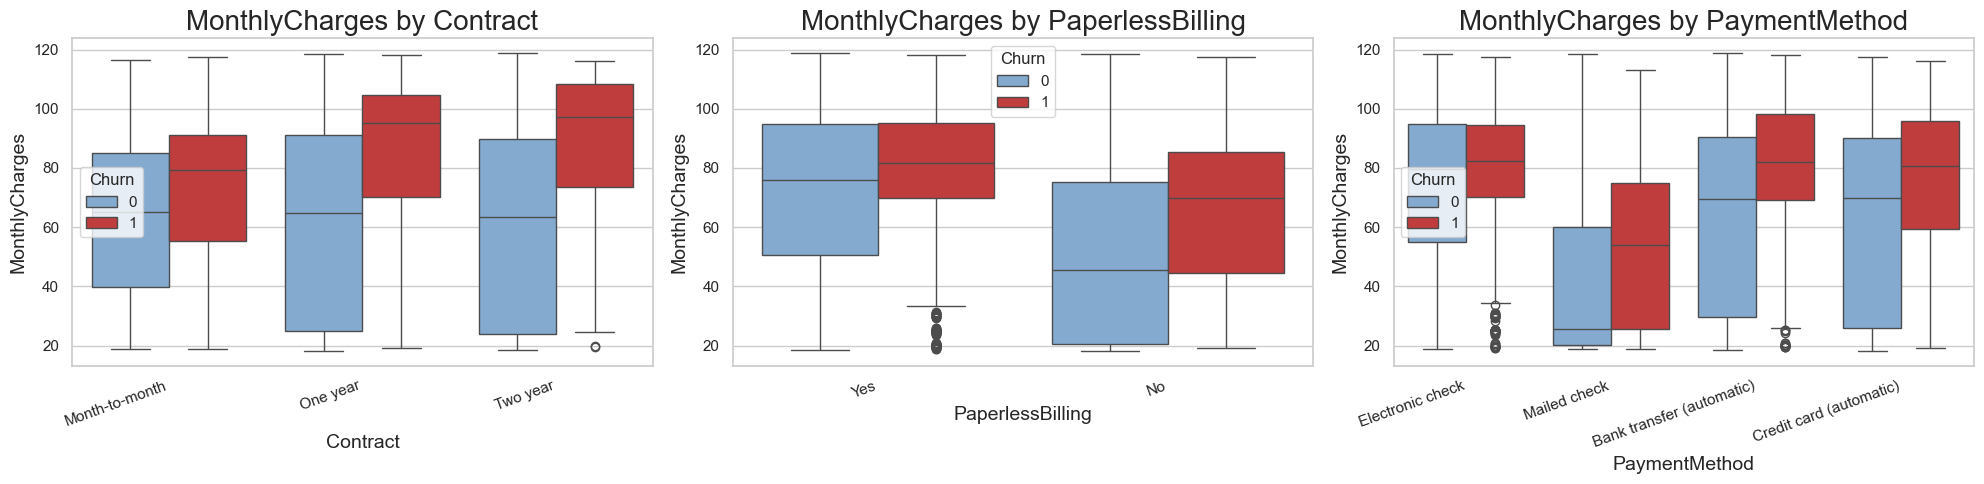

In [25]:
fig=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
for i in range(len(other)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=other[i],y='MonthlyCharges',hue='Churn',data=df,palette=colors)
    plt.xlabel(other[i],fontsize=14)
    plt.ylabel('MonthlyCharges',fontsize=14)
    plt.title(f'MonthlyCharges by {other[i]}',fontsize=20)
    plt.xticks(rotation=20, ha='right')  #For better visibility of x-axis labels
plt.tight_layout()
plt.show()


* Contract: Within each contract type, customers who churn consistently have higher median monthly charges than customers who stay.

* Paperless Billing: Customers with paperless billing who churn pay significantly more, while those without it who churn actually pay less than their non-churning counterparts.

* Payment Method: Customers paying by Electronic check represent a high-risk group, churning at much higher monthly charges compared to loyal customers using the same method.

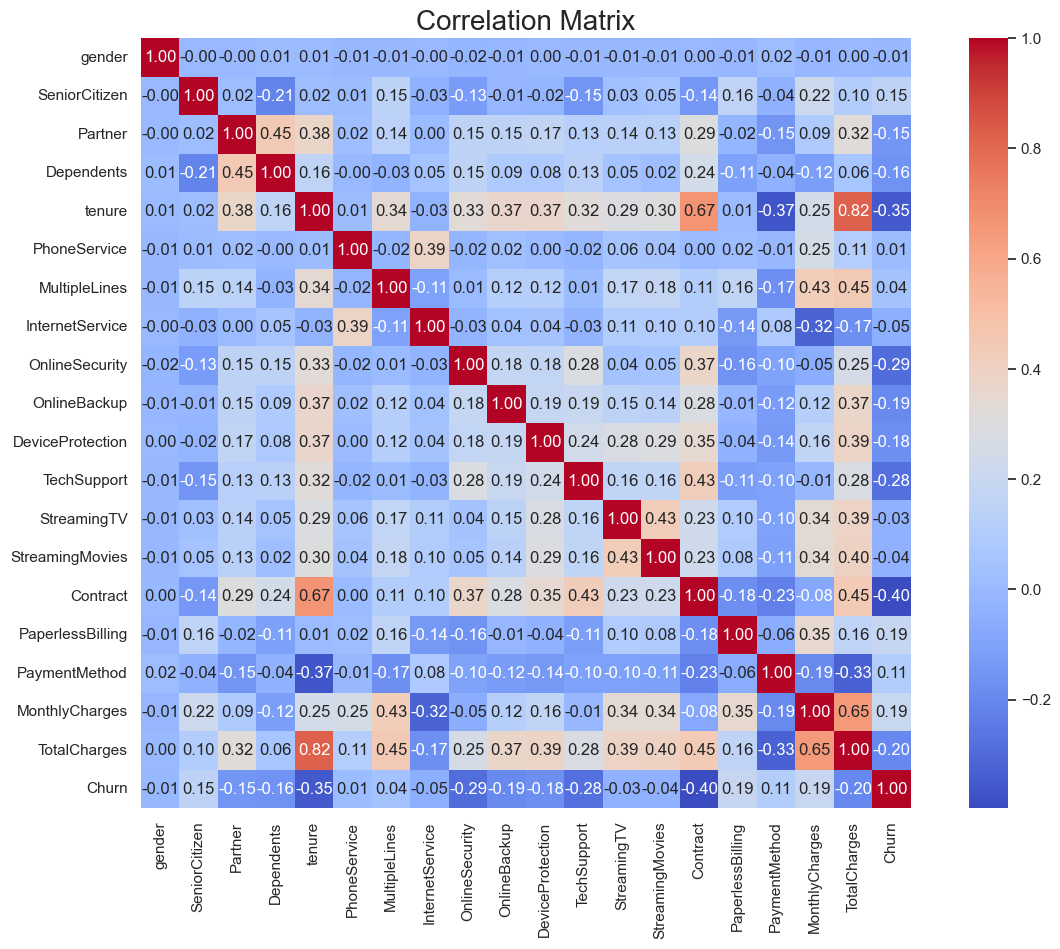

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
corr_df=df.copy()
for column in corr_df.select_dtypes(include=['object']).columns:
    corr_df[column]=le.fit_transform(corr_df[column])
corr=corr_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

**Summary of EDA**

Order of features for Churn cases:
Categorical Features(Order):

1. gender : Male = Female
2. SeniorCitizen : No SeniorCitizen > SeniorCitizen
3. Partner : No Partner > Partner
4. Dependents : No Dependent > Dependent
5. PhoneService : PhoneService > No PhoneService
6. MultipleLines : MultipleLines > No MultipleLines > No PhoneService
7. InternetService : Fiber Optic > DSL > No InternetService
8. OnlineSecurity : Absent > Present > No InternetService
9. OnlineBackup : Absent > Present > No InternetService
10. DeviceProtection : Absent > Present > No InternetService
11. TechSupport : Absent > Present > No InternetService
12. StreamingTV : Absent > Present > No InternetService
13. StreamingMovies : Absent > Present > No InternetService
14. Contract : Month-to-Month > One year > Two year
15. PaperlessBilling : Present > Absent
16. PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!

Numerical Features(Range):
1. tenure : 1 - 10 months, 60-80 months
2. MonthlyCharges : 0-30 USD, 65 - 120 USD
3. TotalCharges : 0 - 1000

**Feature Engineering**

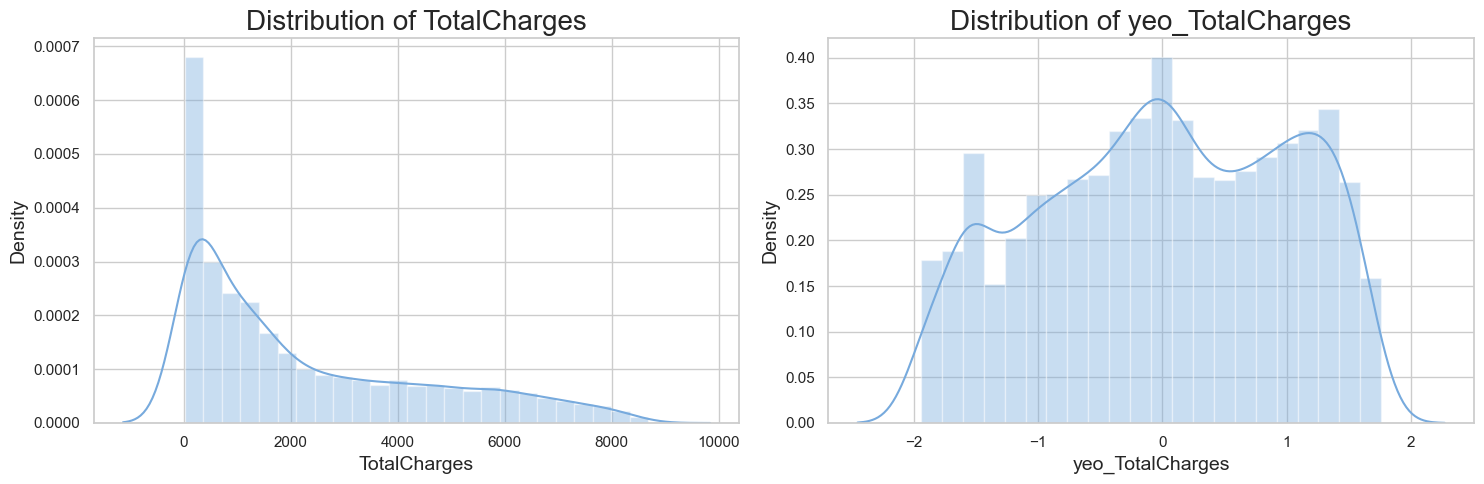

In [27]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
yeo_total_charges=pt.fit_transform(df[['TotalCharges']])
fig=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['TotalCharges'],kde=True,color='#77aadd')
plt.xlabel('TotalCharges',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Distribution of TotalCharges',fontsize=20)
plt.subplot(1,2,2)
sns.distplot(yeo_total_charges,kde=True,color='#77aadd')
plt.xlabel('yeo_TotalCharges',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.title('Distribution of yeo_TotalCharges',fontsize=20)
plt.tight_layout()
plt.show()

* Categorical:gender,Partner,Dependents,PhoneServices,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MultipleLines,InternetServic,PaymentMethod, Contract
* Numeric: tenure, MonthlyCharges(MinMaxScaler)
* Binning: tenure,MonthlyCharges
* Target: Churn

In [29]:
from sklearn.model_selection import train_test_split
x=df.drop('Churn',axis=1)
y=df['Churn']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Creating a custom transformer for binning
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureBinner(BaseEstimator, TransformerMixin):
    def __init__(self):  #To initialize any parameters if needed
        pass
    def fit(self, X, y=None):  #No fitting necessary for binning
        return self

    def transform(self, X):  #This create new binned features
        X = X.copy()
        
        #tenure bins
        X['tenure_bin'] = pd.cut(       
            X['tenure'],
            bins=[0, 10, 60,X['tenure'].max()],labels=['new_customers','existing_customers','old_customers'], 
            right=True,
            include_lowest=True
        )
        #MonthlyCharges bins
        X['MonthlyCharges_bin'] = pd.cut(
            X['MonthlyCharges'],
            bins=[0, 30, 65, X['MonthlyCharges'].max()],labels=['low_charges','medium_charges','high_charges'], 
            right=True,
            include_lowest=True
        )
        return X
        

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_cols=['tenure','MonthlyCharges']
cat_cols=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
yeo_cols=['TotalCharges']

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

yeo_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('yeo_transformer', PowerTransformer(method='yeo-johnson'))
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))
])  

bin_cols=['tenure_bin','MonthlyCharges_bin']

bin_pipe = Pipeline([
    ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))
])


#column transformer will be applied after binning
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('yeo', yeo_pipe, yeo_cols),
        ('cat', cat_pipe, cat_cols),
        ('bins', bin_pipe, bin_cols)
    ], remainder='drop'
)



In [32]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
full_pipeline = ImbPipeline([
    ('binner', FeatureBinner()),  #creates binned features
    ('preprocessor', preprocessor),   #encodes and scales features
    ('smote', SMOTE(random_state=42)),  #applies SMOTE to handle class imbalance
    ('clf',RandomForestClassifier(random_state=42))
])

**Modelling**

In [33]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, make_scorer
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid =[
    # 1.logistic regression
    {
        'clf':[LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced')],
        'clf__C':[0.01, 0.1, 1],
        'clf__penalty':['l2']
    },
    
    # 2.Linear SVC
    {
        'clf':[
            CalibratedClassifierCV(LinearSVC(C=0.01, max_iter=5000, class_weight='balanced', random_state=42), cv=5),
            CalibratedClassifierCV(LinearSVC(C=0.1, max_iter=5000, class_weight='balanced', random_state=42), cv=5),
            CalibratedClassifierCV(LinearSVC(C=1.0, max_iter=5000, class_weight='balanced', random_state=42), cv=5)
        ]
    },
    # 3. XGBoost
    {
        'clf':[XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42,n_jobs=1)],
        'clf__n_estimators':[100,200],
        'clf__max_depth':[3,5],
        'clf__learning_rate':[0.01,0.1]
    },
    # 4. LightGBM
    {
        'clf':[LGBMClassifier(random_state=42,n_jobs=1)],
        'clf__n_estimators':[100,200],
        'clf__max_depth':[3,5],
        'clf__learning_rate':[0.05,0.1]
    },
    # 5. Random Forest
    {
        'clf':[RandomForestClassifier(random_state=42,class_weight='balanced',n_jobs=1)],
        'clf__n_estimators':[100,200],
        'clf__max_depth':[None,10,20]
    }
]

rand=RandomizedSearchCV(
    estimator=full_pipeline,
    param_distributions=param_grid,
    n_iter=30,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

In [34]:
rand.fit(X_train, y_train)
print("Best CV ROC-AUC Score:", rand.best_score_)
print("Best Parameters:", rand.best_params_)

best_pipeline = rand.best_estimator_
y_proba = best_pipeline.predict_proba(X_test)[:,1]
print("Test ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Fitting 5 folds for each of 28 candidates, totalling 140 fits


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/gy/r4rb1fd159s3_lz4bsnlz6n00000gn/T/joblib_memmapping_folder_48723_d902ffb5acda42529f8790819cee249d_577395e187dc4cad9fe4e67bac6fcda6 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-48723-536pwrs9 for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/

[CV] END clf=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42), clf__C=0.01, clf__penalty=l2; total time=   0.1s
[CV] END clf=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42), clf__C=0.01, clf__penalty=l2; total time=   0.1s
[CV] END clf=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42), clf__C=0.01, clf__penalty=l2; total time=   0.1s
[CV] END clf=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42), clf__C=0.01, clf__penalty=l2; total time=   0.1s
[CV] END clf=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42), clf__C=0.1, clf__penalty=l2; total time=   0.1s
[CV] END clf=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42), clf__C=0.1, clf__penalty=l2; total time=   0.1s
[CV] END clf=LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42), clf__C=0.01, clf__penalty=l2; total time=   0.1s
[CV] END clf=LogisticRegressi

In [35]:
print("Classification Report:")
y_pred = best_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1033
           1       0.52      0.75      0.62       372

    accuracy                           0.75      1405
   macro avg       0.71      0.75      0.72      1405
weighted avg       0.79      0.75      0.76      1405



**Model Interpretation**

In [36]:
# ...existing code...
# Feature direction (which side each feature pushes prediction) — run AFTER rand.fit(...)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr

sns.set(style="whitegrid")

if 'best_pipeline' not in globals():
    raise NameError("best_pipeline not found. Run training cell (rand.fit(...)) first.")

# get pieces
binner = best_pipeline.named_steps.get('binner', None)
preproc = best_pipeline.named_steps.get('preprocessor')
clf = best_pipeline.named_steps.get('clf')

if preproc is None:
    raise KeyError("preprocessor not found in best_pipeline")

# robust feature name extraction (tries common APIs, falls back to generic)
def get_feature_names_safe(preproc, X_sample):
    try:
        # sklearn >=1.0
        return list(preproc.get_feature_names_out(X_sample.columns))
    except Exception:
        pass
    # fallback: transform a single-row dataframe (binner must be applied first)
    try:
        Xb = X_sample.copy()
        Xb = binner.transform(Xb) if binner is not None else Xb
        # if binner returned df, take its columns; otherwise assume same cols
        if hasattr(Xb, "columns"):
            cols = list(Xb.columns)
        else:
            cols = list(X_sample.columns)
        # try per-transformer extraction
        names = []
        for name, trans, cols_in in preproc.transformers_:
            if trans == 'drop': 
                continue
            if cols_in == 'remainder': 
                continue
            src = list(cols_in) if not isinstance(cols_in, str) else [cols_in]
            # try get_feature_names_out on last step if pipeline
            tr = trans
            if hasattr(trans, 'named_steps'):
                tr = list(trans.named_steps.values())[-1]
            try:
                if hasattr(tr, "get_feature_names_out"):
                    out = list(tr.get_feature_names_out(src))
                    names.extend(out)
                    continue
            except Exception:
                pass
            try:
                if hasattr(tr, "get_feature_names"):
                    out = list(tr.get_feature_names(src))
                    names.extend(out)
                    continue
            except Exception:
                pass
            names.extend(src)
        # remainder passthrough
        if preproc.remainder == 'passthrough':
            all_src = (binner.transform(X_sample).columns.tolist() if (binner is not None and hasattr(binner.transform(X_sample), "columns")) else X_sample.columns.tolist())
            handled = []
            for t in preproc.transformers_:
                cols_in = t[2]
                if cols_in == 'remainder': 
                    continue
                handled += list(cols_in) if not isinstance(cols_in, str) else [cols_in]
            rem = [c for c in all_src if c not in handled]
            names.extend(rem)
        return names
    except Exception:
        # worst-case generic names
        # compute expected output length by transforming and reading shape
        try:
            Xb = X_sample.copy()
            Xb = binner.transform(Xb) if binner is not None else Xb
            arr = preproc.transform(Xb.iloc[:1])
            return [f"f{i}" for i in range(arr.shape[1])]
        except Exception:
            return [f"f{i}" for i in range(100)]

feature_names = get_feature_names_safe(preproc, X_train.iloc[:5])

# unwrap classifier if wrapped
def _unwrap(est):
    if hasattr(est, "estimator"):
        return est.estimator
    if hasattr(est, "base_estimator"):
        return est.base_estimator
    return est

est = _unwrap(clf)

# get transformed test matrix (what classifier sees before clf)
X_test_binned = binner.transform(X_test) if binner is not None else X_test.copy()
X_test_trans = preproc.transform(X_test_binned)

# predicted probabilities (positive class)
y_proba = best_pipeline.predict_proba(X_test)[:,1]

# Prefer SHAP for direction if available and model suitable
use_shap = False
try:
    import shap
    # Tree explainer for tree models is fast
    if hasattr(est, "feature_importances_") or est.__class__.__name__.lower().startswith(('xgb','lgb','lightgbm','randomforest')):
        expl = shap.TreeExplainer(est)
        shap_vals = expl.shap_values(X_test_trans)
        # shap returns list for multiclass; for binary shap_vals[1] is for positive class
        if isinstance(shap_vals, list):
            shap_pos = np.array(shap_vals[1])
        else:
            shap_pos = np.array(shap_vals)
        use_shap = True
except Exception:
    use_shap = False

if use_shap:
    mean_shap = np.mean(shap_pos, axis=0)
    df_shap = pd.DataFrame({
        'feature': feature_names,
        'mean_shap': mean_shap,
        'mean_abs_shap': np.mean(np.abs(shap_pos), axis=0)
    }).set_index('feature').sort_values('mean_abs_shap', ascending=False)

    # top contributors by absolute importance, with sign
    top10 = df_shap.head(10)
    print("Top 10 contributors (mean abs SHAP). Positive mean_shap => pushes toward CHURN (1):")
    display(top10)

    plt.figure(figsize=(8,6))
    sns.barplot(x=top10['mean_abs_shap'].values, y=top10.index, hue=np.sign(top10['mean_shap']).map({1.0:'CHURN', -1.0:'STAY', 0.0:'NEUTRAL'}), dodge=False, palette={'CHURN':'#d62728','STAY':'#77aadd','NEUTRAL':'gray'})
    plt.title("Top10 features (mean |SHAP|) and direction")
    plt.xlabel("Mean |SHAP|")
    plt.legend(title='Direction', loc='upper right')
    plt.tight_layout()
    plt.show()

    # show most negative (push to STAY) and most positive (push to CHURN)
    most_pos = df_shap.sort_values('mean_shap', ascending=False).head(10)
    most_neg = df_shap.sort_values('mean_shap', ascending=True).head(10)

    plt.figure(figsize=(8,5))
    sns.barplot(x=most_pos['mean_shap'].values, y=most_pos.index, color='#d62728')
    plt.title("Top features pushing toward CHURN (positive mean SHAP)")
    plt.xlabel("Mean SHAP (positive => CHURN)")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8,5))
    sns.barplot(x=most_neg['mean_shap'].values, y=most_neg.index, color='#77aadd')
    plt.title("Top features pushing toward STAY (negative mean SHAP)")
    plt.xlabel("Mean SHAP (negative => STAY)")
    plt.tight_layout()
    plt.show()

else:
    # fallback: use sign of linear coef if available, else Spearman correlation between each transformed feature and predicted prob
    if hasattr(est, "coef_"):
        coefs = est.coef_.ravel()
        df_coef = pd.Series(coefs, index=feature_names).sort_values(key=lambda s: s.abs(), ascending=False)
        print("Linear model: positive coef => pushes toward CHURN (1):")
        display(df_coef.head(20))
    else:
        # compute Spearman correlation between each transformed feature and predicted probability
        corr_list = []
        X_arr = X_test_trans if hasattr(X_test_trans, "shape") else np.array(X_test_trans)
        for i, fname in enumerate(feature_names):
            try:
                val = X_arr[:, i]
                r, _ = spearmanr(val, y_proba)
            except Exception:
                r = 0.0
            corr_list.append((fname, r, abs(r)))
        df_corr = pd.DataFrame(corr_list, columns=['feature','spearman_r','abs_r']).set_index('feature').sort_values('abs_r', ascending=False)
        print("Spearman correlation between each transformed feature and predicted probability (positive => CHURN):")
        display(df_corr.head(20))

        # plot top contributors and their direction
        top_corr = df_corr.head(10)
        plt.figure(figsize=(8,6))
        sns.barplot(x=top_corr['spearman_r'].values, y=top_corr.index, palette=['#d62728' if v>0 else '#77aadd' for v in top_corr['spearman_r'].values])
        plt.title("Top 10 features by |Spearman(r)| and direction")
        plt.xlabel("Spearman r (positive => CHURN)")
        plt.tight_layout()
        plt.show()

# Recommended next step: inspect raw feature (original) values for top direction features to interpret meaning.
# ...existing code...

Linear model: positive coef => pushes toward CHURN (1):


InternetService_Fiber optic          1.849403
Contract_Two year                   -1.766120
tenure                               1.733921
TotalCharges                        -1.680943
Contract_One year                   -0.771468
PhoneService_Yes                    -0.723382
MultipleLines_No phone service      -0.623130
MonthlyCharges_bin_medium_charges    0.592639
StreamingMovies_Yes                  0.543333
MultipleLines_Yes                    0.533372
StreamingTV_Yes                      0.516281
PaperlessBilling_Yes                 0.428665
MonthlyCharges_bin_low_charges       0.351936
PaymentMethod_Electronic check       0.337016
tenure_bin_old_customers            -0.264079
Dependents_Yes                      -0.249575
OnlineSecurity_Yes                  -0.229555
DeviceProtection_Yes                 0.197290
SeniorCitizen_1                      0.178793
OnlineBackup_No internet service    -0.160863
dtype: float64

Above are the most influential factors for churn prediction and those also support our EDA findings like:
* Customers having fibre optic ,multiple lines and paperless billing and electonic check as payement method had high tendency to churn.
* Customers having larger time period contracts like 2 year and 1 year didn't leave company.
* Also old customers are very trustful for the company.
* Low charges and facility of having Phone Service also keep customers away from churning.

**Voting CLF**

In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

estimators = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42, n_jobs= -1)),
    ('lgb', LGBMClassifier(n_estimators=200, num_leaves=31, learning_rate=0.05, random_state=42, n_jobs=-1)),
    ('log', LogisticRegression(C=1.0, solver='saga', class_weight='balanced', max_iter=2000, random_state=42))
]

voting = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

voting_pipe = ImbPipeline([
    ('binner', FeatureBinner()),
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', voting)
])

# CV evaluation (ROC-AUC)
cv_scores = cross_val_score(voting_pipe, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print("Voting CV ROC-AUC mean: {:.4f} ± {:.4f}".format(cv_scores.mean(), cv_scores.std()))


# Fit on full training and evaluate on test
voting_pipe.fit(X_train, y_train)
y_proba = voting_pipe.predict_proba(X_test)[:, 1]
print("Voting Test ROC-AUC: {:.4f}".format(roc_auc_score(y_test, y_proba)))

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/gy/r4rb1fd159s3_lz4bsnlz6n00000gn/T/joblib_memmapping_folder_48723_5271c904bce7490bb9c8acfbefbe30af_ea1b90909b3b4003940b3f7972f4d66f for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/gy/r4rb1fd159s3_lz4bsnlz6n00000gn/T/joblib_memmapping_folder_48723_d902ffb5acda42529f8790819cee249d_3bcb449863d54da9903a9487fbab4637 for automatic cleanup: unk

[LightGBM] [Info] Number of positive: 3305, number of negative: 3305
[LightGBM] [Info] Number of positive: 3304, number of negative: 3304
[LightGBM] [Info] Number of positive: 3305, number of negative: 3305
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2669
[LightGBM] [Info] Number of data points in the train set: 6610, number of used features: 34
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2495
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of data points in the train set: 6608, number of used features: 34
[LightGBM]

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-48742-zxthbaiy for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-48742-488pnbge for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} fo

Voting CV ROC-AUC mean: 0.8478 ± 0.0175
[LightGBM] [Info] Number of positive: 4131, number of negative: 4131
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3279
[LightGBM] [Info] Number of data points in the train set: 8262, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/gy/r4rb1fd159s3_lz4bsnlz6n00000gn/T/joblib_memmapping_folder_48723_d902ffb5acda42529f8790819cee249d_a584cd68493b4b3aa526316de42b395c/48723-4768326640-3ed47d333c3447c8a73bb0d1b12f1219.pkl for automatic cleanup: unknown resource type file
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/gy/r4rb1fd159s3_lz4bsnlz6n00000gn/T/joblib_memmapping_folder_48723_d902ffb5acda42529f8790819cee249d_a584cd6

Voting Test ROC-AUC: 0.8428


In [38]:
print("Classification report")
y_pred = voting_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1033
           1       0.58      0.64      0.61       372

    accuracy                           0.78      1405
   macro avg       0.72      0.74      0.73      1405
weighted avg       0.79      0.78      0.79      1405



Since our objective is to get a higher recall so we choose tuned logistic regression having an recall of 0.74 as compared to voting clf so our final model is tuned logistic regression!!!

Based on our final Logistic Regression model, the most significant factors predicting churn are a Month-to-Month contract and using Fiber Optic internet service. Conversely, having a Two-Year contract was the strongest indicator that a customer will stay. Therefore, the company should focus retention efforts on offering long-term contract incentives to current month-to-month customers

**Future Work**

* Tune the prediction threshold to optimize for an even higher Recall
* Analyze the financial impact of churn and estimate the ROI of our proposed retention campaigns.

**Model Deployment**

In [39]:
import joblib 
model_pipeline=best_pipeline        #using the best pipeline from randomized search
joblib.dump(model_pipeline,'churn_final_model_pipeline.joblib')       #saving the model pipeline


['churn_final_model_pipeline.joblib']

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-48723-28_7sgkl for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /loky-48723-ieoje7pm for automatic cleanup: unknown resource type semlock
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} fo